# Python for Data Science Workshop - Spring 2018
June 7, 2018

Instructor: Fernando Rodriguez

Clickstream examples and exercises provided by Jihyun Park

## Session 7: Accessing Folders, Reading in Files, Append Method

<br><br>
## Reviewing how to accesss folders and file paths

Python uses the <b>os</b> module to get around the fact that operating systems have differet path name conventions.

We have to import the os module to use it

In [1]:
import os

#### Getting current working directory

Using os.getcwd() method

This is usually the file path of where we are running this notebook.

In [2]:
os.getcwd()

'/Volumes/GoogleDrive/My Drive/Python Workspace/Python-for-Data-Science-Workshop'

Take a moment to add the csv files to your directory. I have created a seperate folder that has these files.

<br>
#### Storing folder paths
If we have files in several different folders, we can store their paths in variables.

In [3]:
CurrentDir = "/Volumes/GoogleDrive/My Drive/Python Workspace/Python-for-Data-Science-Workshop"

files = "/Volumes/GoogleDrive/My Drive/Python Workspace/Python-for-Data-Science-Workshop/s6data"

#### Accessing files in folder paths
We can see the different files in our folder paths by using the .listdir() method.

In [7]:
os.listdir(CurrentDir)

['Session2.ipynb',
 'images',
 '.ipynb_checkpoints',
 'README.md',
 '.git',
 'Session3.ipynb',
 'Session4.ipynb',
 'WorkingNotes.ipynb',
 'Session5.ipynb',
 'Session6.ipynb',
 's6data',
 '104500.csv',
 'Session7.ipynb']

In [9]:
os.listdir(files)

['105751.csv', '106707.csv', '104716.csv', '104500.csv']

<br>
#### Using the 'with' Statement

With statements automatically close the file after the nested block of code. It helps with handling common preparation and cleanup tasks.

#### csv.reader method
.reader method returns the objects in a csv file which will iterate over lines

usually has two common arguments. 

1) the csv file

2) the delimiter
    

In [4]:
# First we need to import the csv module
import csv

open() returns a file object and has two common arguments

(filename, mode)

mode <b>`r`</b> is for when the file will only be read

In [11]:
open("104500.csv", "r")

<open file '104500.csv', mode 'r' at 0x110062300>

<br>
#### Creating a variable that stores a folder directory and filename

If you stored your csv files in a folder, you have to join the folder path and the name of the csv file.

use the .path and .join method to save the file path and file name in a variable.

In [5]:
files = "/Volumes/GoogleDrive/My Drive/Python Workspace/Python-for-Data-Science-Workshop/s6data"

csv_file = os.path.join(files, '104500.csv')

In [20]:
open(csv_file, "r")

<open file '/Volumes/GoogleDrive/My Drive/Python Workspace/Python-for-Data-Science-Workshop/s6data/104500.csv', mode 'r' at 0x1100625d0>

<br><br>
### Opening and reading out rows from a csv file

##### Method 1: Using the current working directory if that's where your data files are kept

In [14]:
# Print out the lines that are being read using a csv reader
# we are using 'f' to label our csv file in this with statement

with open('104500.csv', 'r') as f:
    reader = csv.reader(f, delimiter = ",")
    for line in reader:
        print line
    

['roster_randomid', 'url', 'action', 'created_at', 'interaction_seconds', 'remote_ip']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1', 'show', '2016-08-01T17:29:47Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:37Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400', 'show', '2016-08-01T17:29:25Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:02Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230', 'show', '2016-08-01T17:28:51Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1', 'show', '2016-07-27T01:50:13Z', '', '70.209.208.98']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?mod

##### Method 2: If we stored our data in another folder, using a variable (csv_file), which contains the directory and csv file. 

In [21]:
with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter = ",")
    for line in reader:
        print line

['roster_randomid', 'url', 'action', 'created_at', 'interaction_seconds', 'remote_ip']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1', 'show', '2016-08-01T17:29:47Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:37Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400', 'show', '2016-08-01T17:29:25Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039', 'show', '2016-08-01T17:29:02Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230', 'show', '2016-08-01T17:28:51Z', '', '70.209.201.77']
['104500', 'https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1', 'show', '2016-07-27T01:50:13Z', '', '70.209.208.98']
['104500', 'https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?mod

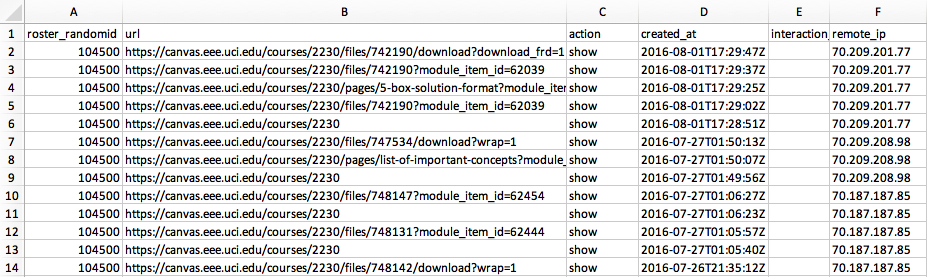

In [22]:
from IPython.display import Image

Image(filename='images/clickstreamdata2.png') 

#### Header column

In order to put each column entry into a variable, we need to know what they are and their index.

To print out the header (row 1 of the csv file), you need to 
1. use the .next method to print out the first row and save it to the variable 'heading'
2. print 'heading'

In [25]:
with open('104500.csv', "r") as f:
    header = f.next()
    print header

roster_randomid,url,action,created_at,interaction_seconds,remote_ip



<br>
### Putting columns into a list of variables

### Exercise

For every line in the csv file, 104500.csv, we are going to use a for-loop to save the following 4 columns:

1. roster_randomid<br>
2. url<br>
3. created_at<br>
4. ip<br>

<b>Instructions</b>
1. Create new variables. One variable for each fo the above columns. Each variable should be a list. They should be empty (e.g., Initializing).

2. Open the csv file, 104500.csv, using one of the two <b>with open( )</b> methods.

3. Within the 'with open()' statement that opens the csv file, <b>write a for-loop</b> that iterates through every line in the csv file. The for-loop should be indented within the 'with open()' statement. (First line of for-loop code provided)

4. In the for-loop, save the colum information for each of the 4 colums (roster_randomid, url, created_at, ip). <i>Hint, hint!</i>: Use indexing.

5. Within the for-loop, print the url variable you created. This will help us check whether our for-loop works.

In [26]:
# we are going to put each entry in a list as a variable# Inste 
rid = [] # roster randomid
url = [] # url list
timestamp = []
ip = []

with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=",")
    header = reader.next()

    for line in reader:
        rid = line[0]
        url = line[1]
        timestamp = line[3]
        ip = line[5]
        
        print url


https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1
https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039
https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400
https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039
https://canvas.eee.uci.edu/courses/2230
https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1
https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?module_item_id=62386
https://canvas.eee.uci.edu/courses/2230
https://canvas.eee.uci.edu/courses/2230/files/748147?module_item_id=62454
https://canvas.eee.uci.edu/courses/2230
https://canvas.eee.uci.edu/courses/2230/files/748131?module_item_id=62444
https://canvas.eee.uci.edu/courses/2230
https://canvas.eee.uci.edu/courses/2230/files/748142/download?wrap=1
https://canvas.eee.uci.edu/courses/2230/files/748132/download?wrap=1
https://canvas.eee.uci.edu/courses/2230/files/748141/download?wrap=1
https://

In [ ]:
# Solution with explanations

# Initializing
# we are going to put each entry in a list as a variable

rid = []
url = []
timestamp = []
ip  = []

# Opening our csv file, 104500.csv. 
# Note that I am using method 2, where my data was stored in a separate folder
# so I had to create a variable, csv_file, which contained the folder path and csv file.

with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=",")
    header = reader.next() #  We need to add this in order to pass the header

# Writing a for-loop within the `with` statement. Note that it is indented.
# `line` is our psuedo-variable that signifies each row found in our variable 'reader'

    for line in reader: 
        rid = line[0]
        url = line[1]
        timestamp = line[3]
        ip = line[5]
        print url

<br><br>
### Append Method

If you study the foor-loop carefully, you'll notice that we have simply been overwriting our lists. You can check this by printing one of our variables outside of the for loop.

In [27]:
print url

https://canvas.eee.uci.edu/courses/2230


Its the equivalent of doing this.

In [29]:
sampleList = []

sampleList = [1]
print sampleList

sampleList = [2]
print sampleList

[1]
[2]


In order to save all of the content that is being interated through the for-loop, we need to <b>append</b> the information that is being assigned into our variables.

the <b>.append()</b> allows us to do just that. This method allows us to add a single element to the end of a list. 

In [32]:

sampleList = [1]
print sampleList

sampleList.append(2)

print sampleList

[1]
[1, 2]


Notice that we are not using append in a way that assigns the value back into the same variable. This will not work correctly.

In [31]:
sampleList = sampleList.append(3)
print sampleList

None


<br>
### Exercise

Let's add append methods within the for-loop we created.

Instructions:
1. Modify the for-loop code, where the 4 variables are appending each line

2. print out the variable list, url, in a seperate line, outside of the for-loop (hint: un-indented print)

In [8]:
rid = []
url = []
timestamp = []
ip  = []



with open(csv_file, 'r') as f:
    reader = csv.reader(f, delimiter=",")
    header = reader.next()

    for line in reader: 
        rid.append(line[0])
        url.append(line[1])
        timestamp.append(line[3])
        ip.append(line[5])





In [12]:
url

['https://canvas.eee.uci.edu/courses/2230/files/742190/download?download_frd=1',
 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039',
 'https://canvas.eee.uci.edu/courses/2230/pages/5-box-solution-format?module_item_id=62400',
 'https://canvas.eee.uci.edu/courses/2230/files/742190?module_item_id=62039',
 'https://canvas.eee.uci.edu/courses/2230',
 'https://canvas.eee.uci.edu/courses/2230/files/747534/download?wrap=1',
 'https://canvas.eee.uci.edu/courses/2230/pages/list-of-important-concepts?module_item_id=62386',
 'https://canvas.eee.uci.edu/courses/2230',
 'https://canvas.eee.uci.edu/courses/2230/files/748147?module_item_id=62454',
 'https://canvas.eee.uci.edu/courses/2230',
 'https://canvas.eee.uci.edu/courses/2230/files/748131?module_item_id=62444',
 'https://canvas.eee.uci.edu/courses/2230',
 'https://canvas.eee.uci.edu/courses/2230/files/748142/download?wrap=1',
 'https://canvas.eee.uci.edu/courses/2230/files/748132/download?wrap=1',
 'https://canvas.eee.